In [1]:
# import modules
import pandas as pd
from functions import LDA
import matplotlib.pyplot as plt
from ast import literal_eval

# import data
df = pd.read_csv('data/nvidia_articles.csv', converters={'content': literal_eval,
                                                         'stemmed_content': literal_eval,
                                                         'lemmatized_content': literal_eval})

### Iteration 1

In [2]:
# train model
lda = LDA(docs=df['content'], n_topics=10)
lda.train_model()

# get metrics
coherence = lda.coherence_score()
diversity = lda.diversity_score(n_words=10)

# print metrics
print(f'Coherence score: {coherence:.3f}')
print(f'Diversity score: {diversity:.3f}')

Coherence score: 0.359
Diversity score: 0.150


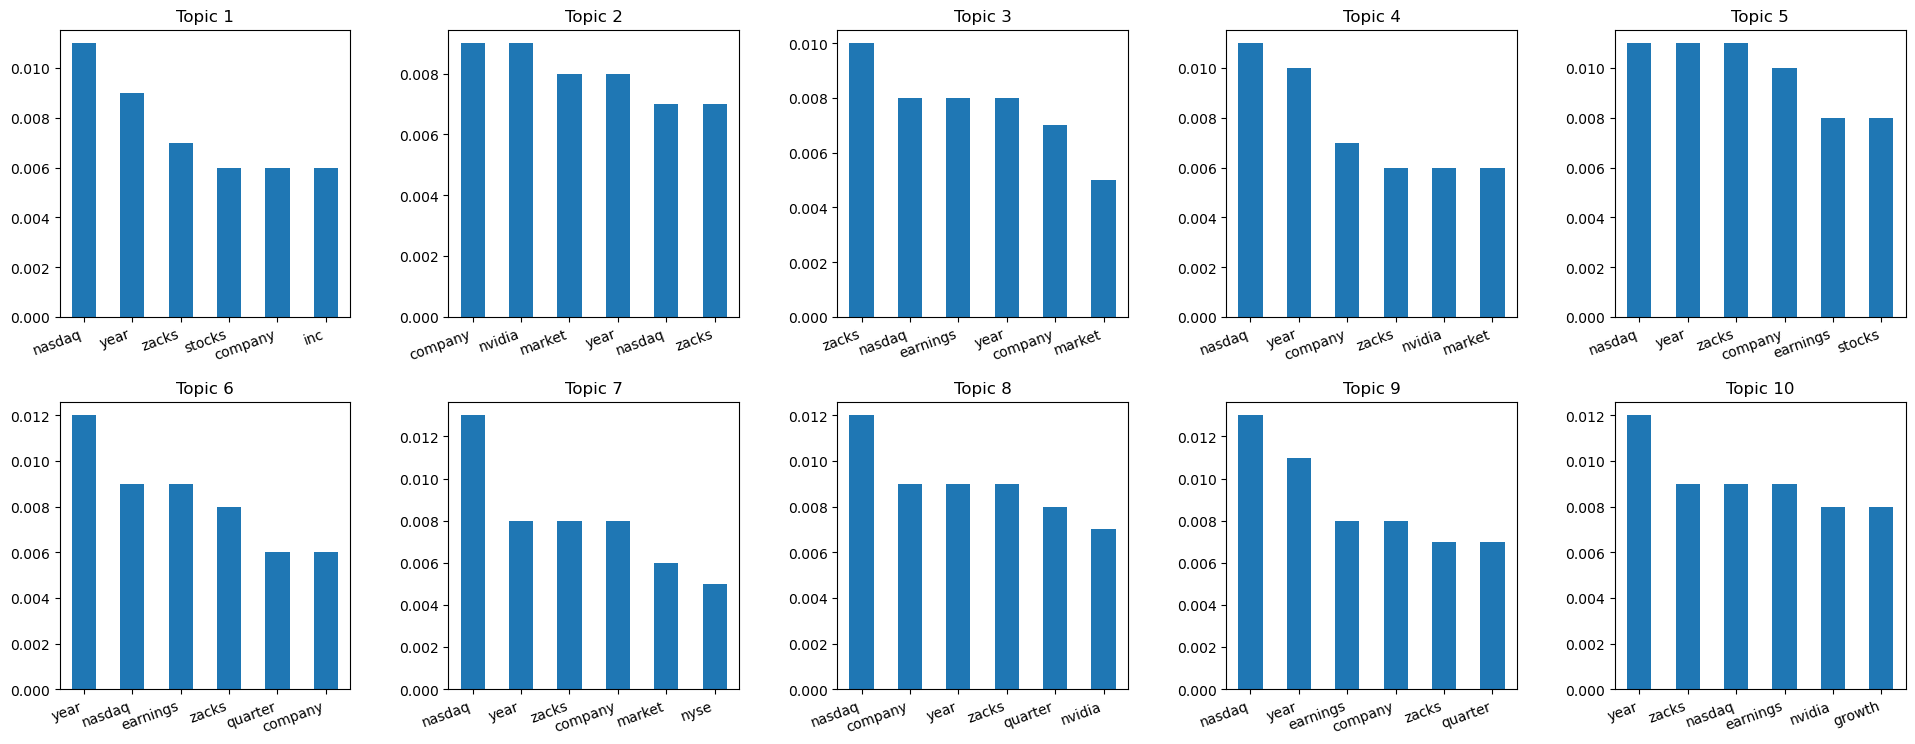

In [3]:
lda.plot_topics(n_words=6)

### Iteration 2

In [8]:
# train model
lda = LDA(docs=df['lemmatized_content'], n_topics=10)
lda.train_model()

# get metrics
coherence = lda.coherence_score()
diversity = lda.diversity_score(n_words=10)

# print metrics
print(f'Coherence score: {coherence:.3f}')
print(f'Diversity score: {diversity:.3f}')

Coherence score: 0.375
Diversity score: 0.160


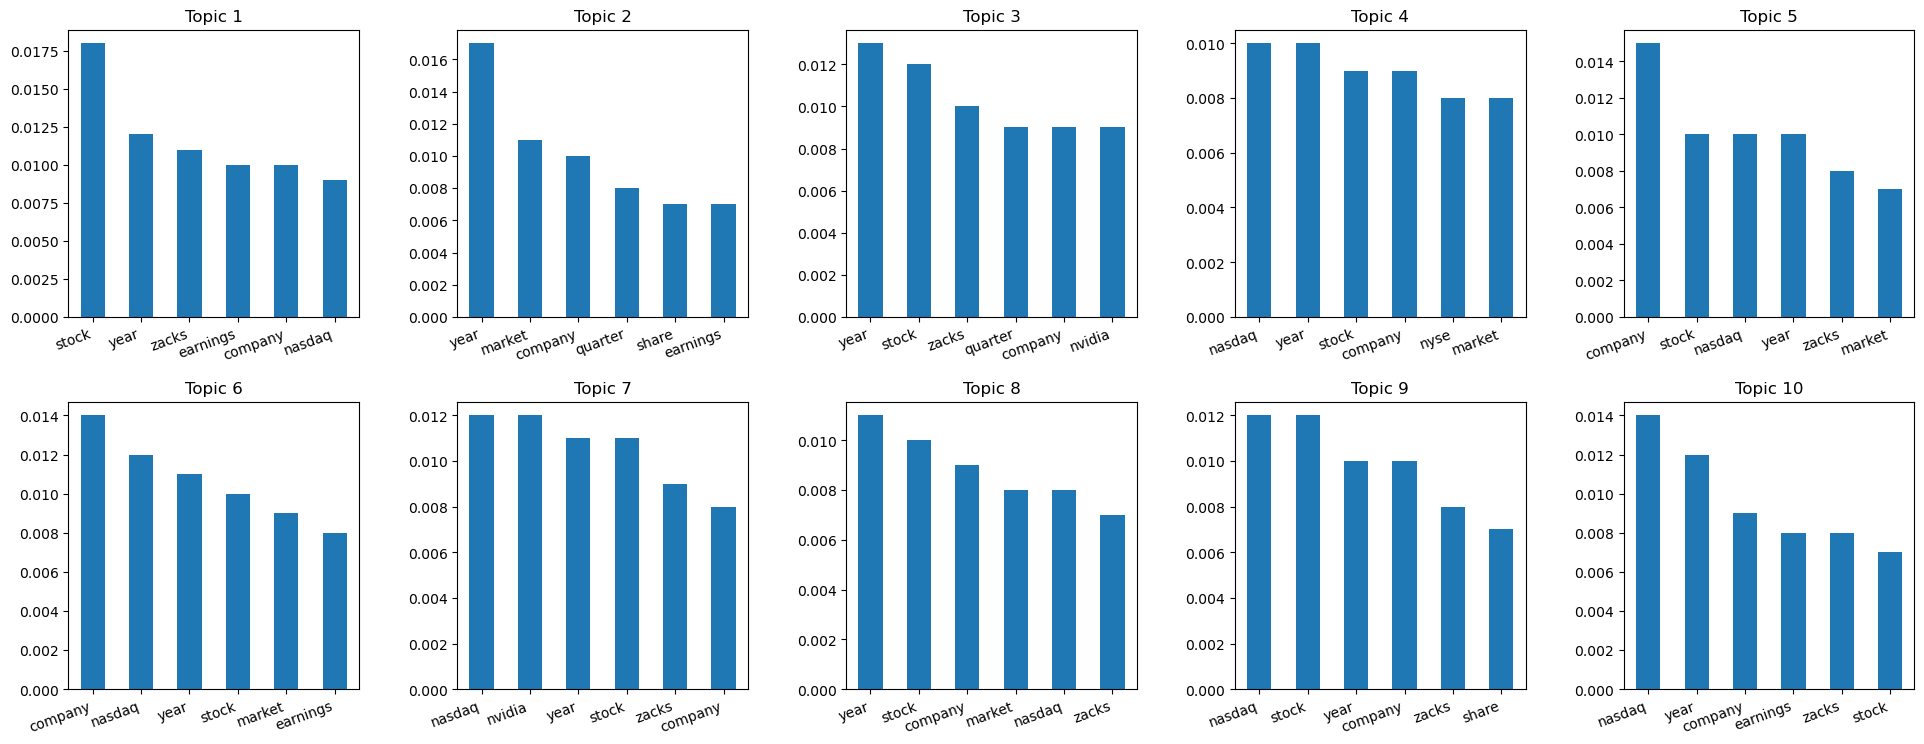

In [9]:
lda.plot_topics(n_words=6)

### Iteration 3

In [15]:
# create dataframe to store results
df_results = []
models = []

for p_max in [0.4, 0.55, 0.7, 0.85]:
    # train model
    lda = LDA(docs=df['lemmatized_content'], n_topics=10, p_max=p_max)
    lda.train_model()

    # get metrics
    coherence = lda.coherence_score()
    diversity = lda.diversity_score(n_words=10)

    # store results
    df_results.append({'p_max': p_max,
                       'coherence': coherence,
                       'diversity': diversity,
                       'n_filterwords': len(lda.filterwords)})
    models.append(lda)
    
df_results = pd.DataFrame(df_results)

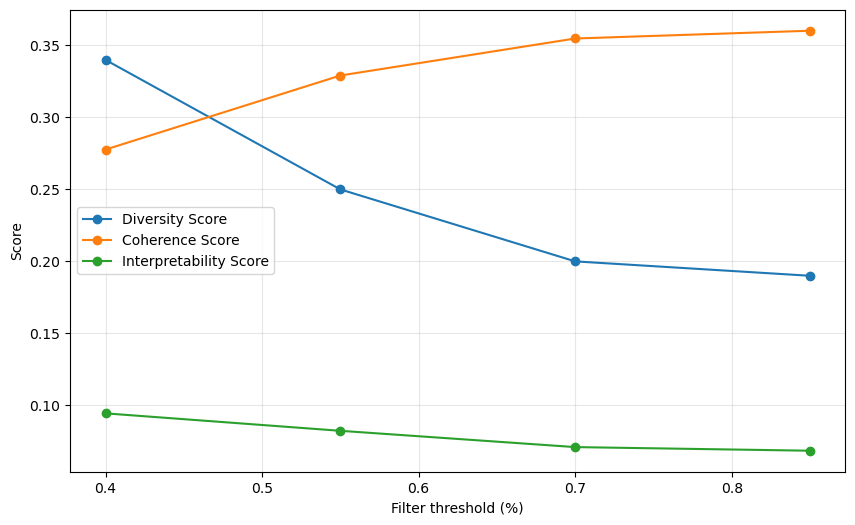

In [ ]:
df_results['interpretability'] = df_results['coherence'] * df_results['diversity']

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(df_results['p_max'], df_results['diversity'], marker='o', label='Diversity Score')
plt.plot(df_results['p_max'], df_results['coherence'], marker='o', label='Coherence Score')
plt.plot(df_results['p_max'], df_results['interpretability'], marker='o', label='Interpretability Score')

# Adding titles and labels
plt.xlabel('Filter threshold (%)')
plt.ylabel('Score')
plt.legend();
# add grid
plt.grid(alpha=0.3);

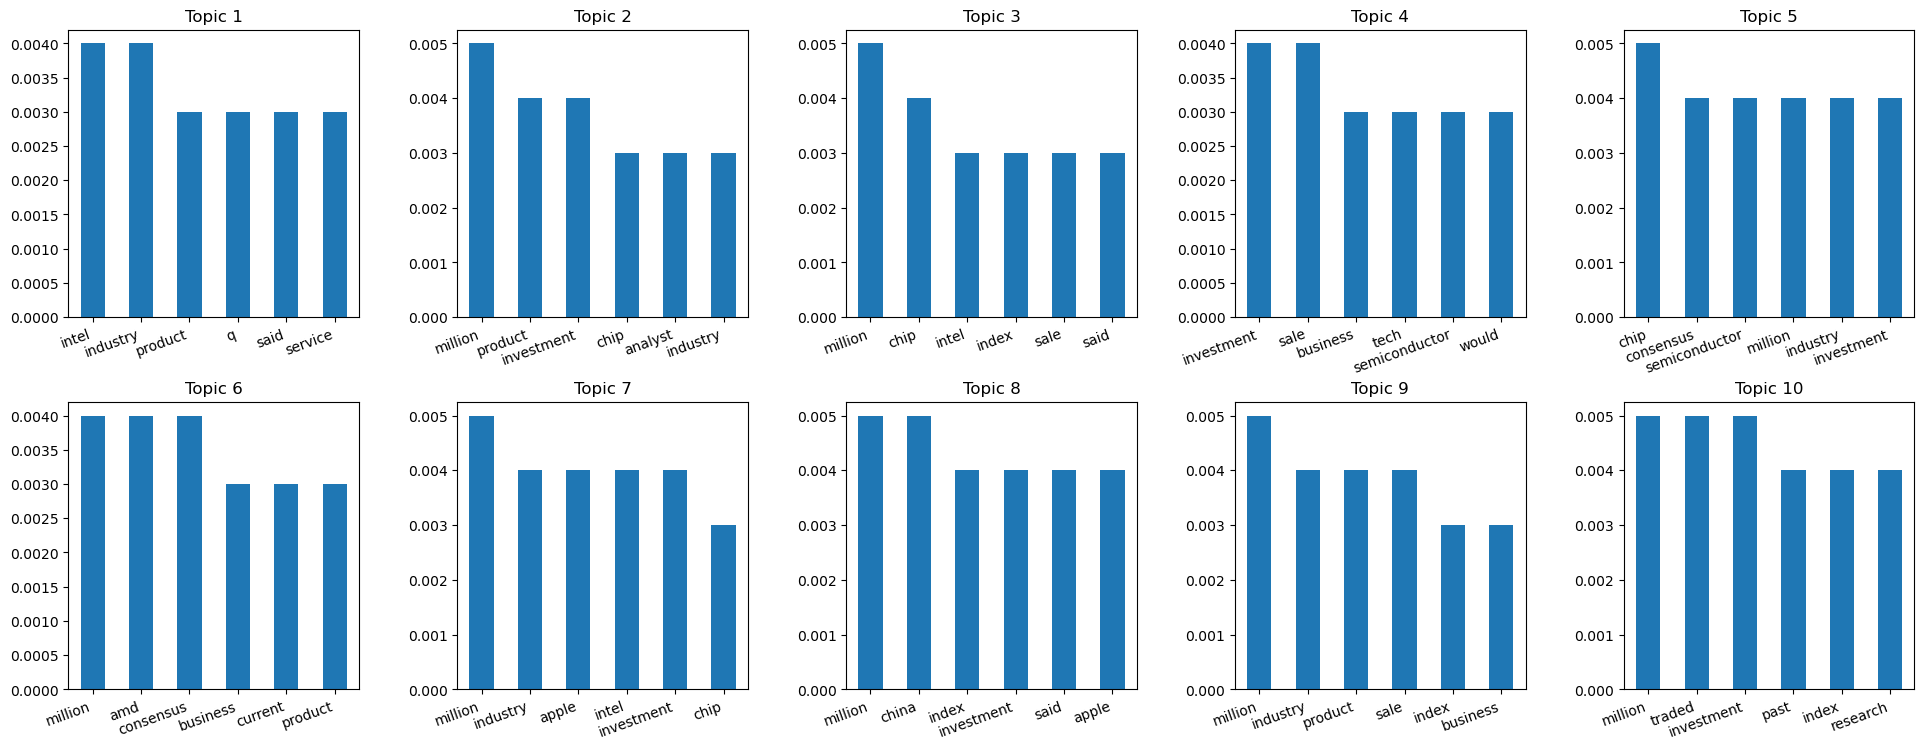

In [18]:
models[0].plot_topics(n_words=6)

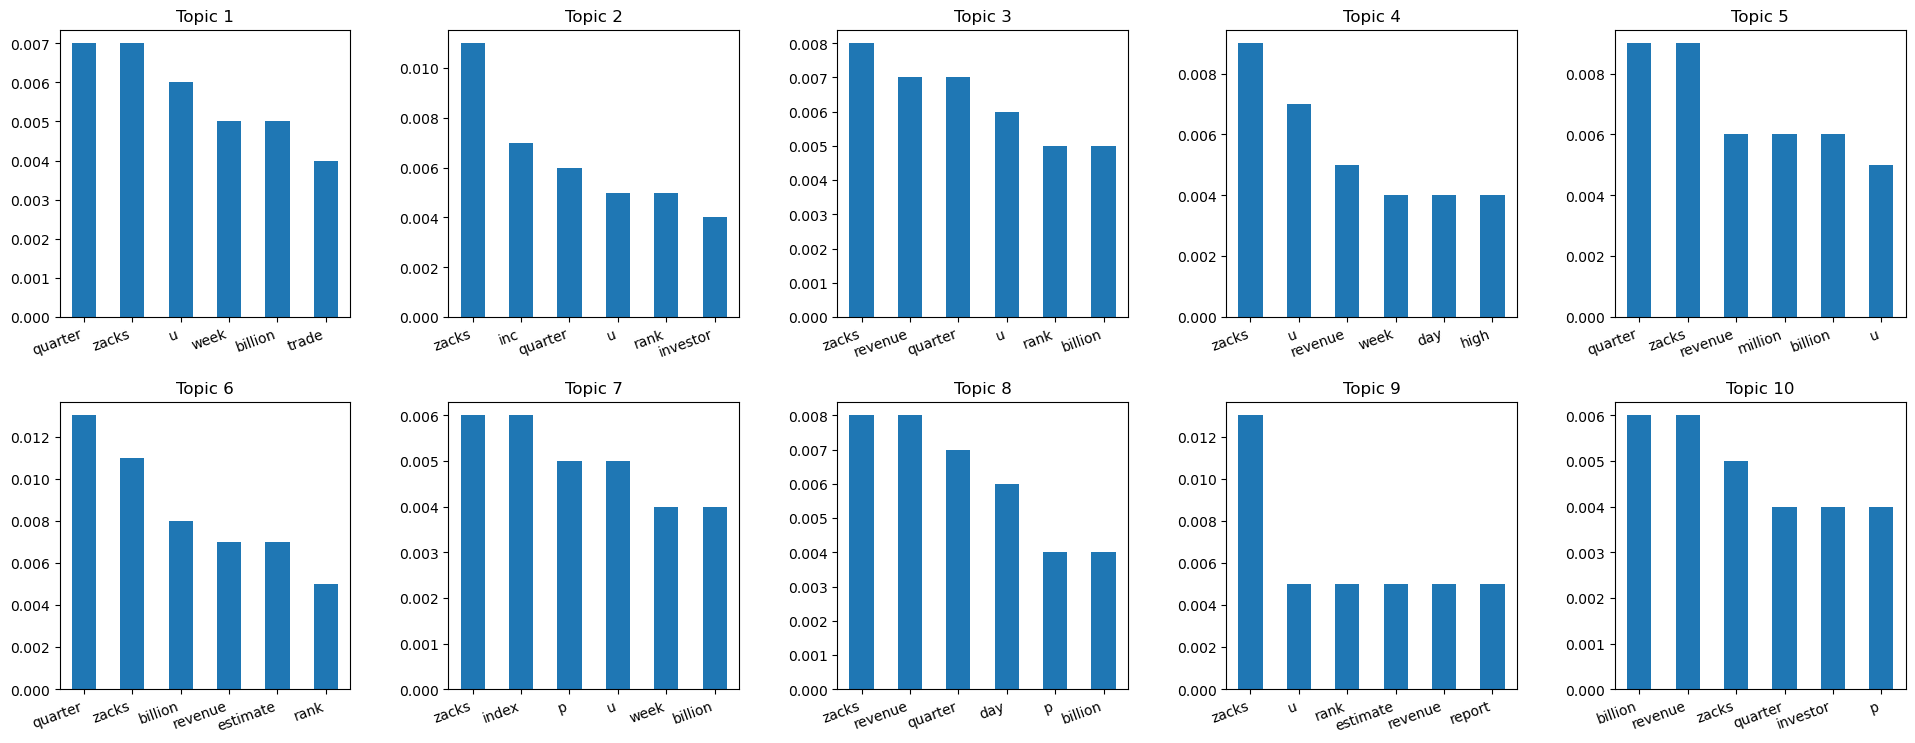

In [19]:
models[1].plot_topics(n_words=6)

### Iteration 3.5

In [12]:
# train model
lda = LDA(docs=df['lemmatized_content'], n_topics=10, n_min=10, use_tfidf=True)
lda.train_model()

# get metrics
coherence = lda.coherence_score()
diversity = lda.diversity_score(n_words=10)

# print metrics
print(f'Coherence score: {coherence:.3f}')
print(f'Diversity score: {diversity:.3f}')

c:\Users\sjoer\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Coherence score: 0.660
Diversity score: 0.200


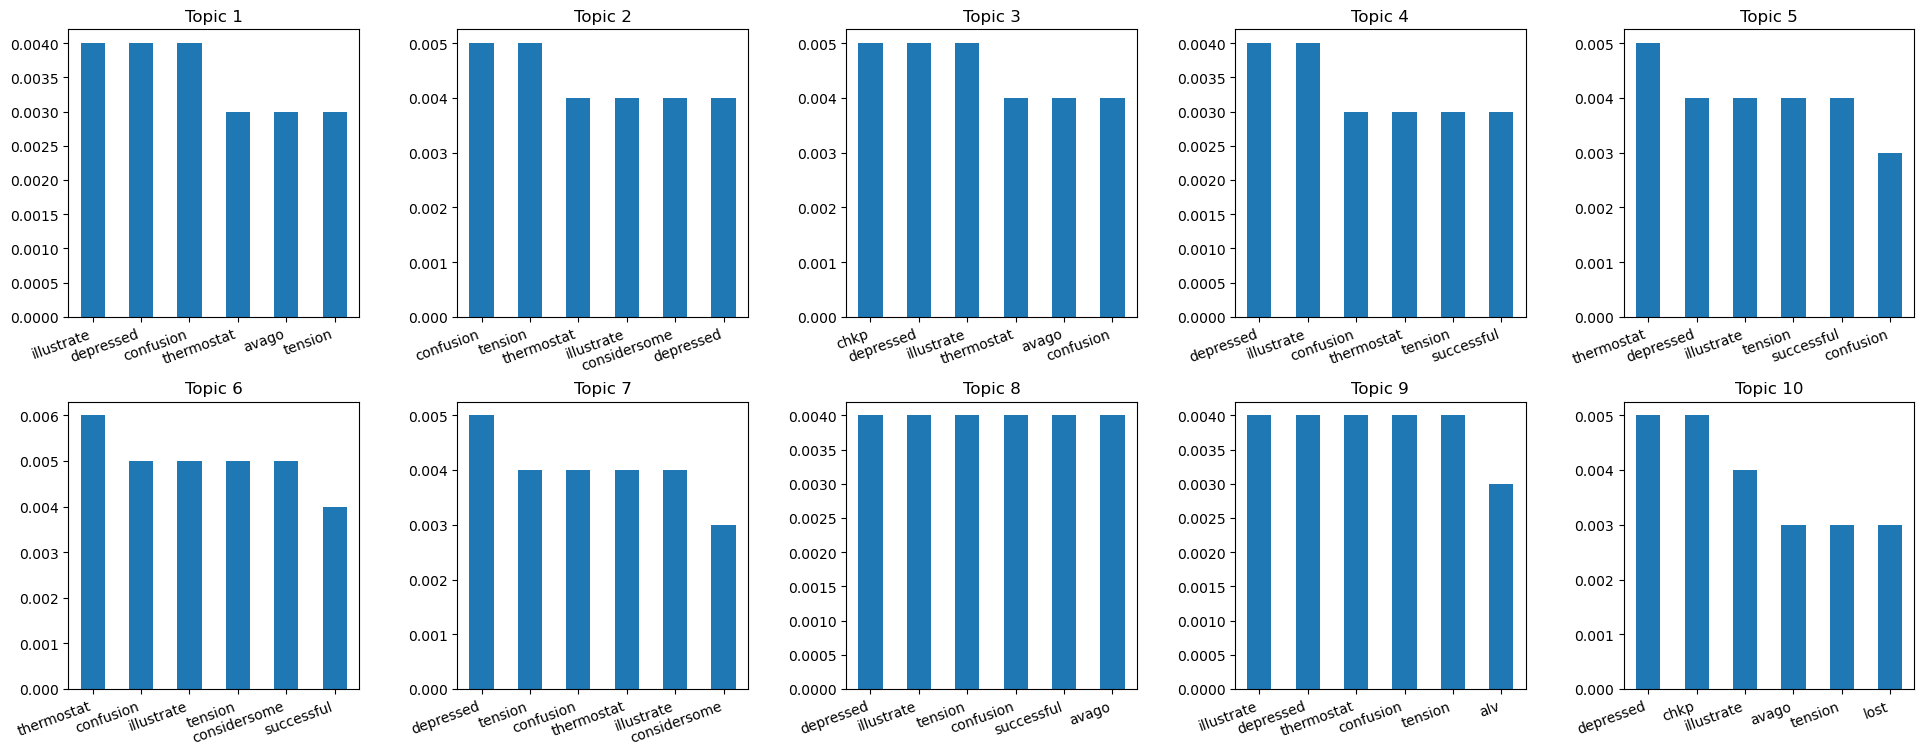

In [13]:
lda.plot_topics(n_words=6)

### Iteration 4

In [19]:
# explore optimal number of topics
n_topics_list = [2, 3, 5, 7, 10, 15, 20]

# create dataframe to store results
df_results = []
models = []

for n_topics in n_topics_list:
    # train model
    lda = LDA(docs=df['lemmatized_content'], n_topics=n_topics, p_max=0.5)
    lda.train_model()

    # get metrics
    coherence = lda.coherence_score()
    diversity = lda.diversity_score(n_words=10)

    # store results
    df_results.append({'n_topics': n_topics,
                          'coherence': coherence,
                          'diversity': diversity})
    
    models.append(lda)
    
df_results = pd.DataFrame(df_results)

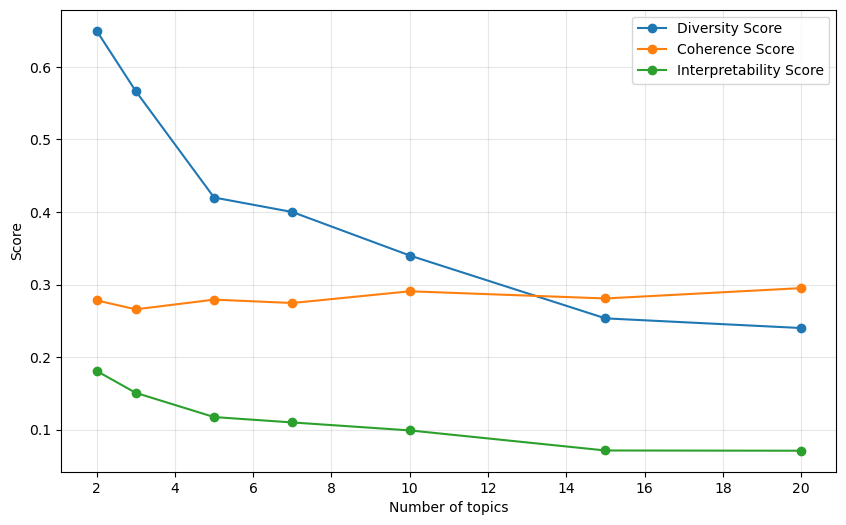

In [22]:
# Plotting the data
df_results['interpretability'] = df_results['coherence'] * df_results['diversity']

plt.figure(figsize=(10, 6))
plt.plot(df_results['n_topics'], df_results['diversity'], marker='o', label='Diversity Score')
plt.plot(df_results['n_topics'], df_results['coherence'], marker='o', label='Coherence Score')
plt.plot(df_results['n_topics'], df_results['interpretability'], marker='o', label='Interpretability Score')

# Adding titles and labels
plt.xlabel('Number of topics')
plt.ylabel('Score')
plt.legend()

# custom xticks
plt.xticks(range(2, 21, 2))
# add grid
plt.grid(alpha=0.3);

In [ ]:
# define custom stopwords
custom_stopwords = ['like', 'also', 'said', 'would', 'could', \
                    'million', 'billion', 'year', 'week', 'day', 'month', \
                    'p', 'u', 'estimate', 'rank', 'inc', 'per', 'top']

# train model
lda = LDA(docs=df['lemmatized_content'], n_topics=5, p_max=0.5, custom_stopwords=custom_stopwords)
lda.train_model()

# get metrics
coherence = lda.coherence_score()
diversity = lda.diversity_score(n_words=10)

# print metrics
print(f'Coherence score: {coherence:.3f}')
print(f'Diversity score: {diversity:.3f}')

Coherence score: 0.282
Diversity score: 0.440


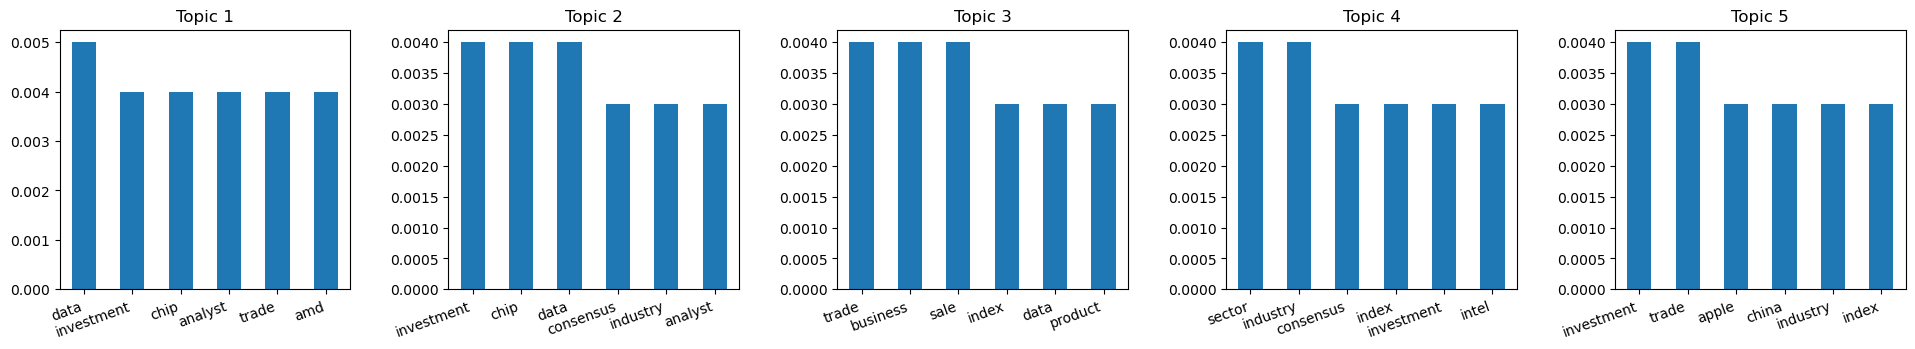

In [14]:
lda.plot_topics(n_words=6)

In [ ]:
# create dataframe to evaluate topics of articles
 
if (len(lda.docs_matrix) == len(df)):
    doc_topics = [lda.model.get_document_topics(doc) for doc in lda.docs_matrix]

df_topics = pd.DataFrame(doc_topics)
for i in range(lda.n_topics):
    df_topics[i] = df_topics[i].apply(lambda x: x[1] if x is not None else 0)

# get highest topic for each document
df_topics['topic'] = df_topics.idxmax(axis=1)

# check correlation between article category and topic
confusion_matrix = pd.crosstab(df['category'], df_topics['topic'])
confusion_matrix

topic,0,1,2,3,4
category,,,,,
news,598,275,151,69,16
opinion,748,727,473,306,94


In [ ]:
from pprint import pprint

# see most representative articles
topic_i = 0
representative_article = df_topics[topic_i].idxmax()
pprint(df['original_content'].iloc[representative_article])

('Recent Performance of the Stocks Mentioned Below   Average 1 Week Return   3 '
 '15  Average 1 Month Return   8 09  Average 1 Year Return   22 86    1  '
 'Agilent Technologies Inc   A   Provides bio analytical and electronic '
 'measurement solutions to the communications  electronics  life sciences  and '
 'chemical analysis industries in the United States and internationally  Beta '
 'at 1 51  SMA50 at  37 67 vs  SMA200 at  39 93    2  Alcoa  Inc   AA   '
 'Engages in the production and management of aluminum  fabricated aluminum  '
 'and alumina  Beta at 2 05  SMA50 at  8 88 vs  SMA200 at  9 09  3  Advanced '
 'Micro Devices  Inc   AMD   Operates as a semiconductor company in the United '
 'States  Japan  China  and Europe  Beta at 2 2  SMA50 at  2 9 vs  SMA200 at  '
 '5 41    4  Allegheny Technologies Inc   ATI   Produces and sells specialty '
 'metals worldwide  Beta at 1 8  SMA50 at  30 86 vs  SMA200 at  34 95    5  '
 'BorgWarner Inc   BWA   Engages in the manufacture and sal

### Other

In [18]:
# requires installing pyldavis
# requires pandas version to 1.5.1

import pyLDAvis

LDAvis_prepared = pyLDAvis.gensim.prepare(lda.model, lda.docs_matrix, lda.id2word)
pyLDAvis.save_html(LDAvis_prepared, './LDA_results/ldavis_prepared_'+ str(lda.n_topics) +'i4.html')

AttributeError: module 'pyLDAvis' has no attribute 'gensim'